In [1]:
import os, re, math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

FILES = [
    r"C:\Users\Melita\CSE 4001\VLM-Eval-Research\Output\CALVI\Llava7b_Eval\Random\calvi_llava7b_run_01.csv",
    r"C:\Users\Melita\CSE 4001\VLM-Eval-Research\Output\CALVI\Llava7b_Eval\Random\calvi_llava7b_run_02.csv",
    r"C:\Users\Melita\CSE 4001\VLM-Eval-Research\Output\CALVI\Llava7b_Eval\Random\calvi_llava7b_run_03.csv",
]

GROUP_COL = "Misleader"
OUT_CSV   = "llava7b_calvi_accuracy_summary.csv"

def run_id(p):
    m = re.search(r"run[_\- ]?(\d+)", os.path.basename(p), re.I)
    return int(m.group(1)) if m else None

def tcrit_95(n):
    if n <= 1: return np.nan
    table = {2:12.706,3:4.303,4:3.182,5:2.776,6:2.571,7:2.447,8:2.365,9:2.306,
             10:2.262,15:2.145,20:2.093,30:2.042}
    if n in table: return table[n]
    return 1.96 if n>30 else table[min(table, key=lambda k: abs(k-n))]

runs = []
for f in FILES:
    df = pd.read_csv(f)

    # normalize GROUP_COL name if needed
    if GROUP_COL not in df.columns:
        for c in df.columns:
            if c.lower().replace(" ", "") in {"misleader","misleadertype","calvi_type"}:
                df = df.rename(columns={c: GROUP_COL})
                break
    if GROUP_COL not in df.columns:
        raise KeyError(f"'{GROUP_COL}' not found in {f}")

    is_correct = (
        df["model_answer"].astype(str).str.strip().str.lower()
        == df["correct_answer"].astype(str).str.strip().str.lower()
    ).astype(int)

    acc = (
        pd.DataFrame({GROUP_COL: df[GROUP_COL], "is_correct": is_correct})
        .groupby(GROUP_COL)["is_correct"].mean().mul(100)
        .reset_index(name="accuracy")
    )
    acc["Run"] = run_id(f)
    runs.append(acc)

per_run = pd.concat(runs, ignore_index=True)

summary = (
    per_run.groupby(GROUP_COL)["accuracy"]
    .agg(mean="mean", sd=lambda s: s.std(ddof=1), n="count")
    .reset_index()
)
summary["se"]    = summary["sd"] / np.sqrt(summary["n"])
summary["tcrit"] = summary["n"].apply(tcrit_95)
summary["ci_lo"] = summary["mean"] - summary["tcrit"] * summary["se"]
summary["ci_hi"] = summary["mean"] + summary["tcrit"] * summary["se"]

summary = summary[[GROUP_COL,"mean","sd","se","ci_lo","ci_hi","n"]].sort_values(GROUP_COL)
print(summary)
summary.to_csv(OUT_CSV, index=False)

                                            Misleader       mean         sd  \
0                                      Cherry Picking  50.000000  50.000000   
1                               Concealed Uncertainty  77.777778  38.490018   
2                           Inappropriate Aggregation  33.333333  16.666667   
3        Manipulation of Scales - Inappropriate Order  40.000000   0.000000   
4   Manipulation of Scales - Inappropriate Scale R...  50.000000  12.500000   
5   Manipulation of Scales - Inappropriate Use of ...  33.333333  14.433757   
6   Manipulation of Scales - Unconventional Scale ...  30.000000  10.000000   
7                               Misleading Annotation  22.222222  19.245009   
8                              Misleading Annotations  33.333333  57.735027   
9                                        Missing Data  33.333333  57.735027   
10                              Missing Normalization  66.666667  57.735027   
11                                       Overplottin

In [2]:
FILES = [
    r"C:\Users\Melita\CSE 4001\VLM-Eval-Research\Output\CALVI\Llava13b_Eval\Random\calvi_llava13b_run_01.csv",
    r"C:\Users\Melita\CSE 4001\VLM-Eval-Research\Output\CALVI\Llava13b_Eval\Random\calvi_llava13b_run_02.csv",
    r"C:\Users\Melita\CSE 4001\VLM-Eval-Research\Output\CALVI\Llava13b_Eval\Random\calvi_llava13b_run_03.csv",
]

GROUP_COL = "Misleader"
OUT_CSV   = "llava13b_calvi_accuracy_summary.csv"

def run_id(p):
    m = re.search(r"run[_\- ]?(\d+)", os.path.basename(p), re.I)
    return int(m.group(1)) if m else None

def tcrit_95(n):
    if n <= 1: return np.nan
    table = {2:12.706,3:4.303,4:3.182,5:2.776,6:2.571,7:2.447,8:2.365,9:2.306,
             10:2.262,15:2.145,20:2.093,30:2.042}
    if n in table: return table[n]
    return 1.96 if n>30 else table[min(table, key=lambda k: abs(k-n))]

runs = []
for f in FILES:
    df = pd.read_csv(f)

    # normalize GROUP_COL name if needed
    if GROUP_COL not in df.columns:
        for c in df.columns:
            if c.lower().replace(" ", "") in {"misleader","misleadertype","calvi_type"}:
                df = df.rename(columns={c: GROUP_COL})
                break
    if GROUP_COL not in df.columns:
        raise KeyError(f"'{GROUP_COL}' not found in {f}")

    is_correct = (
        df["model_answer"].astype(str).str.strip().str.lower()
        == df["correct_answer"].astype(str).str.strip().str.lower()
    ).astype(int)

    acc = (
        pd.DataFrame({GROUP_COL: df[GROUP_COL], "is_correct": is_correct})
        .groupby(GROUP_COL)["is_correct"].mean().mul(100)
        .reset_index(name="accuracy")
    )
    acc["Run"] = run_id(f)
    runs.append(acc)

per_run = pd.concat(runs, ignore_index=True)

summary = (
    per_run.groupby(GROUP_COL)["accuracy"]
    .agg(mean="mean", sd=lambda s: s.std(ddof=1), n="count")
    .reset_index()
)
summary["se"]    = summary["sd"] / np.sqrt(summary["n"])
summary["tcrit"] = summary["n"].apply(tcrit_95)
summary["ci_lo"] = summary["mean"] - summary["tcrit"] * summary["se"]
summary["ci_hi"] = summary["mean"] + summary["tcrit"] * summary["se"]

summary = summary[[GROUP_COL,"mean","sd","se","ci_lo","ci_hi","n"]].sort_values(GROUP_COL)
print(summary)
summary.to_csv(OUT_CSV, index=False)

                                            Misleader       mean         sd  \
0                                      Cherry Picking  83.333333  28.867513   
1                               Concealed Uncertainty  55.555556  19.245009   
2                           Inappropriate Aggregation  22.222222   9.622504   
3        Manipulation of Scales - Inappropriate Order   0.000000   0.000000   
4   Manipulation of Scales - Inappropriate Scale R...  20.833333   7.216878   
5   Manipulation of Scales - Inappropriate Use of ...  33.333333  14.433757   
6   Manipulation of Scales - Unconventional Scale ...  30.000000  10.000000   
7                               Misleading Annotation  11.111111  19.245009   
8                              Misleading Annotations  33.333333  57.735027   
9                                        Missing Data   0.000000   0.000000   
10                              Missing Normalization  66.666667  57.735027   
11                                       Overplottin

In [3]:
FILES = [
    r"C:\Users\Melita\CSE 4001\VLM-Eval-Research\Output\CALVI\Qwen2.5vl_3b_Eval\Random\calvi_qwen2.5vl_3b_run_01.csv",
    r"C:\Users\Melita\CSE 4001\VLM-Eval-Research\Output\CALVI\Qwen2.5vl_3b_Eval\Random\calvi_qwen2.5vl_3b_run_02.csv",
    r"C:\Users\Melita\CSE 4001\VLM-Eval-Research\Output\CALVI\Qwen2.5vl_3b_Eval\Random\calvi_qwen2.5vl_3b_run_03.csv",
]

GROUP_COL = "Misleader"
OUT_CSV   = "qwen2.5vl_3b_calvi_accuracy_summary.csv"

def run_id(p):
    m = re.search(r"run[_\- ]?(\d+)", os.path.basename(p), re.I)
    return int(m.group(1)) if m else None

def tcrit_95(n):
    if n <= 1: return np.nan
    table = {2:12.706,3:4.303,4:3.182,5:2.776,6:2.571,7:2.447,8:2.365,9:2.306,
             10:2.262,15:2.145,20:2.093,30:2.042}
    if n in table: return table[n]
    return 1.96 if n>30 else table[min(table, key=lambda k: abs(k-n))]

runs = []
for f in FILES:
    df = pd.read_csv(f)

    # normalize GROUP_COL name if needed
    if GROUP_COL not in df.columns:
        for c in df.columns:
            if c.lower().replace(" ", "") in {"misleader","misleadertype","calvi_type"}:
                df = df.rename(columns={c: GROUP_COL})
                break
    if GROUP_COL not in df.columns:
        raise KeyError(f"'{GROUP_COL}' not found in {f}")

    is_correct = (
        df["model_answer"].astype(str).str.strip().str.lower()
        == df["correct_answer"].astype(str).str.strip().str.lower()
    ).astype(int)

    acc = (
        pd.DataFrame({GROUP_COL: df[GROUP_COL], "is_correct": is_correct})
        .groupby(GROUP_COL)["is_correct"].mean().mul(100)
        .reset_index(name="accuracy")
    )
    acc["Run"] = run_id(f)
    runs.append(acc)

per_run = pd.concat(runs, ignore_index=True)

summary = (
    per_run.groupby(GROUP_COL)["accuracy"]
    .agg(mean="mean", sd=lambda s: s.std(ddof=1), n="count")
    .reset_index()
)
summary["se"]    = summary["sd"] / np.sqrt(summary["n"])
summary["tcrit"] = summary["n"].apply(tcrit_95)
summary["ci_lo"] = summary["mean"] - summary["tcrit"] * summary["se"]
summary["ci_hi"] = summary["mean"] + summary["tcrit"] * summary["se"]

summary = summary[[GROUP_COL,"mean","sd","se","ci_lo","ci_hi","n"]].sort_values(GROUP_COL)
print(summary)
summary.to_csv(OUT_CSV, index=False)

                                            Misleader        mean   sd   se  \
0                                      Cherry Picking   50.000000  0.0  0.0   
1                               Concealed Uncertainty  100.000000  0.0  0.0   
2                           Inappropriate Aggregation   16.666667  0.0  0.0   
3        Manipulation of Scales - Inappropriate Order   20.000000  0.0  0.0   
4   Manipulation of Scales - Inappropriate Scale R...    0.000000  0.0  0.0   
5   Manipulation of Scales - Inappropriate Use of ...    0.000000  0.0  0.0   
6   Manipulation of Scales - Unconventional Scale ...   30.000000  0.0  0.0   
7                               Misleading Annotation   66.666667  0.0  0.0   
8                              Misleading Annotations    0.000000  0.0  0.0   
9                                        Missing Data    0.000000  0.0  0.0   
10                              Missing Normalization    0.000000  0.0  0.0   
11                                       Overplottin

In [4]:
FILES = [
    r"C:\Users\Melita\CSE 4001\VLM-Eval-Research\Output\CALVI\Qwen2.5vl_7b_Eval\Random\calvi_qwen2.5vl_7b_run_01.csv",
    r"C:\Users\Melita\CSE 4001\VLM-Eval-Research\Output\CALVI\Qwen2.5vl_7b_Eval\Random\calvi_qwen2.5vl_7b_run_02.csv",
    r"C:\Users\Melita\CSE 4001\VLM-Eval-Research\Output\CALVI\Qwen2.5vl_7b_Eval\Random\calvi_qwen2.5vl_7b_run_03.csv",
]

GROUP_COL = "Misleader"
OUT_CSV   = "qwen2.5vl_7b_calvi_accuracy_summary.csv"

def run_id(p):
    m = re.search(r"run[_\- ]?(\d+)", os.path.basename(p), re.I)
    return int(m.group(1)) if m else None

def tcrit_95(n):
    if n <= 1: return np.nan
    table = {2:12.706,3:4.303,4:3.182,5:2.776,6:2.571,7:2.447,8:2.365,9:2.306,
             10:2.262,15:2.145,20:2.093,30:2.042}
    if n in table: return table[n]
    return 1.96 if n>30 else table[min(table, key=lambda k: abs(k-n))]

runs = []
for f in FILES:
    df = pd.read_csv(f)

    # normalize GROUP_COL name if needed
    if GROUP_COL not in df.columns:
        for c in df.columns:
            if c.lower().replace(" ", "") in {"misleader","misleadertype","calvi_type"}:
                df = df.rename(columns={c: GROUP_COL})
                break
    if GROUP_COL not in df.columns:
        raise KeyError(f"'{GROUP_COL}' not found in {f}")

    is_correct = (
        df["model_answer"].astype(str).str.strip().str.lower()
        == df["correct_answer"].astype(str).str.strip().str.lower()
    ).astype(int)

    acc = (
        pd.DataFrame({GROUP_COL: df[GROUP_COL], "is_correct": is_correct})
        .groupby(GROUP_COL)["is_correct"].mean().mul(100)
        .reset_index(name="accuracy")
    )
    acc["Run"] = run_id(f)
    runs.append(acc)

per_run = pd.concat(runs, ignore_index=True)

summary = (
    per_run.groupby(GROUP_COL)["accuracy"]
    .agg(mean="mean", sd=lambda s: s.std(ddof=1), n="count")
    .reset_index()
)
summary["se"]    = summary["sd"] / np.sqrt(summary["n"])
summary["tcrit"] = summary["n"].apply(tcrit_95)
summary["ci_lo"] = summary["mean"] - summary["tcrit"] * summary["se"]
summary["ci_hi"] = summary["mean"] + summary["tcrit"] * summary["se"]

summary = summary[[GROUP_COL,"mean","sd","se","ci_lo","ci_hi","n"]].sort_values(GROUP_COL)
print(summary)
summary.to_csv(OUT_CSV, index=False)

                                            Misleader        mean   sd   se  \
0                                      Cherry Picking    0.000000  0.0  0.0   
1                               Concealed Uncertainty  100.000000  0.0  0.0   
2                           Inappropriate Aggregation    0.000000  0.0  0.0   
3        Manipulation of Scales - Inappropriate Order   60.000000  0.0  0.0   
4   Manipulation of Scales - Inappropriate Scale R...   12.500000  0.0  0.0   
5   Manipulation of Scales - Inappropriate Use of ...    0.000000  0.0  0.0   
6   Manipulation of Scales - Unconventional Scale ...   20.000000  0.0  0.0   
7                               Misleading Annotation   66.666667  0.0  0.0   
8                              Misleading Annotations    0.000000  0.0  0.0   
9                                        Missing Data    0.000000  0.0  0.0   
10                              Missing Normalization    0.000000  0.0  0.0   
11                                       Overplottin

In [5]:
FILES = [
    r"C:\Users\Melita\CSE 4001\VLM-Eval-Research\Output\CALVI\Gemma3_12b_Eval\Random\calvi_gemma3_12b_run_01.csv",
    r"C:\Users\Melita\CSE 4001\VLM-Eval-Research\Output\CALVI\Gemma3_12b_Eval\Random\calvi_gemma3_12b_run_02.csv",
    r"C:\Users\Melita\CSE 4001\VLM-Eval-Research\Output\CALVI\Gemma3_12b_Eval\Random\calvi_gemma3_12b_run_03.csv",
]

GROUP_COL = "Misleader"
OUT_CSV   = "gemma3_12b_calvi_accuracy_summary.csv"

def run_id(p):
    m = re.search(r"run[_\- ]?(\d+)", os.path.basename(p), re.I)
    return int(m.group(1)) if m else None

def tcrit_95(n):
    if n <= 1: return np.nan
    table = {2:12.706,3:4.303,4:3.182,5:2.776,6:2.571,7:2.447,8:2.365,9:2.306,
             10:2.262,15:2.145,20:2.093,30:2.042}
    if n in table: return table[n]
    return 1.96 if n>30 else table[min(table, key=lambda k: abs(k-n))]

runs = []
for f in FILES:
    df = pd.read_csv(f)

    # normalize GROUP_COL name if needed
    if GROUP_COL not in df.columns:
        for c in df.columns:
            if c.lower().replace(" ", "") in {"misleader","misleadertype","calvi_type"}:
                df = df.rename(columns={c: GROUP_COL})
                break
    if GROUP_COL not in df.columns:
        raise KeyError(f"'{GROUP_COL}' not found in {f}")

    is_correct = (
        df["model_answer"].astype(str).str.strip().str.lower()
        == df["correct_answer"].astype(str).str.strip().str.lower()
    ).astype(int)

    acc = (
        pd.DataFrame({GROUP_COL: df[GROUP_COL], "is_correct": is_correct})
        .groupby(GROUP_COL)["is_correct"].mean().mul(100)
        .reset_index(name="accuracy")
    )
    acc["Run"] = run_id(f)
    runs.append(acc)

per_run = pd.concat(runs, ignore_index=True)

summary = (
    per_run.groupby(GROUP_COL)["accuracy"]
    .agg(mean="mean", sd=lambda s: s.std(ddof=1), n="count")
    .reset_index()
)
summary["se"]    = summary["sd"] / np.sqrt(summary["n"])
summary["tcrit"] = summary["n"].apply(tcrit_95)
summary["ci_lo"] = summary["mean"] - summary["tcrit"] * summary["se"]
summary["ci_hi"] = summary["mean"] + summary["tcrit"] * summary["se"]

summary = summary[[GROUP_COL,"mean","sd","se","ci_lo","ci_hi","n"]].sort_values(GROUP_COL)
print(summary)
summary.to_csv(OUT_CSV, index=False)

                                            Misleader       mean         sd  \
0                                      Cherry Picking   0.000000   0.000000   
1                               Concealed Uncertainty  33.333333   0.000000   
2                           Inappropriate Aggregation  33.333333   0.000000   
3        Manipulation of Scales - Inappropriate Order   0.000000   0.000000   
4   Manipulation of Scales - Inappropriate Scale R...   8.333333   7.216878   
5   Manipulation of Scales - Inappropriate Use of ...  41.666667  14.433757   
6   Manipulation of Scales - Unconventional Scale ...  30.000000   0.000000   
7                               Misleading Annotation  33.333333   0.000000   
8                              Misleading Annotations   0.000000   0.000000   
9                                        Missing Data   0.000000   0.000000   
10                              Missing Normalization   0.000000   0.000000   
11                                       Overplottin

In [6]:
FILES = [
    r"C:\Users\Melita\CSE 4001\VLM-Eval-Research\Output\CALVI\Gemma3_4b_Eval\Random\calvi_gemma3_4b_run_01.csv",
    r"C:\Users\Melita\CSE 4001\VLM-Eval-Research\Output\CALVI\Gemma3_4b_Eval\Random\calvi_gemma3_4b_run_02.csv",
    r"C:\Users\Melita\CSE 4001\VLM-Eval-Research\Output\CALVI\Gemma3_4b_Eval\Random\calvi_gemma3_4b_run_03.csv",
]

GROUP_COL = "Misleader"
OUT_CSV   = "gemma3_4b_calvi_accuracy_summary.csv"

def run_id(p):
    m = re.search(r"run[_\- ]?(\d+)", os.path.basename(p), re.I)
    return int(m.group(1)) if m else None

def tcrit_95(n):
    if n <= 1: return np.nan
    table = {2:12.706,3:4.303,4:3.182,5:2.776,6:2.571,7:2.447,8:2.365,9:2.306,
             10:2.262,15:2.145,20:2.093,30:2.042}
    if n in table: return table[n]
    return 1.96 if n>30 else table[min(table, key=lambda k: abs(k-n))]

runs = []
for f in FILES:
    df = pd.read_csv(f)

    # normalize GROUP_COL name if needed
    if GROUP_COL not in df.columns:
        for c in df.columns:
            if c.lower().replace(" ", "") in {"misleader","misleadertype","calvi_type"}:
                df = df.rename(columns={c: GROUP_COL})
                break
    if GROUP_COL not in df.columns:
        raise KeyError(f"'{GROUP_COL}' not found in {f}")

    is_correct = (
        df["model_answer"].astype(str).str.strip().str.lower()
        == df["correct_answer"].astype(str).str.strip().str.lower()
    ).astype(int)

    acc = (
        pd.DataFrame({GROUP_COL: df[GROUP_COL], "is_correct": is_correct})
        .groupby(GROUP_COL)["is_correct"].mean().mul(100)
        .reset_index(name="accuracy")
    )
    acc["Run"] = run_id(f)
    runs.append(acc)

per_run = pd.concat(runs, ignore_index=True)

summary = (
    per_run.groupby(GROUP_COL)["accuracy"]
    .agg(mean="mean", sd=lambda s: s.std(ddof=1), n="count")
    .reset_index()
)
summary["se"]    = summary["sd"] / np.sqrt(summary["n"])
summary["tcrit"] = summary["n"].apply(tcrit_95)
summary["ci_lo"] = summary["mean"] - summary["tcrit"] * summary["se"]
summary["ci_hi"] = summary["mean"] + summary["tcrit"] * summary["se"]

summary = summary[[GROUP_COL,"mean","sd","se","ci_lo","ci_hi","n"]].sort_values(GROUP_COL)
print(summary)
summary.to_csv(OUT_CSV, index=False)

                                            Misleader        mean   sd   se  \
0                                      Cherry Picking   50.000000  0.0  0.0   
1                               Concealed Uncertainty    0.000000  0.0  0.0   
2                           Inappropriate Aggregation   33.333333  0.0  0.0   
3        Manipulation of Scales - Inappropriate Order    0.000000  0.0  0.0   
4   Manipulation of Scales - Inappropriate Scale R...   37.500000  0.0  0.0   
5   Manipulation of Scales - Inappropriate Use of ...   50.000000  0.0  0.0   
6   Manipulation of Scales - Unconventional Scale ...   10.000000  0.0  0.0   
7                               Misleading Annotation   66.666667  0.0  0.0   
8                              Misleading Annotations    0.000000  0.0  0.0   
9                                        Missing Data  100.000000  0.0  0.0   
10                              Missing Normalization    0.000000  0.0  0.0   
11                                       Overplottin

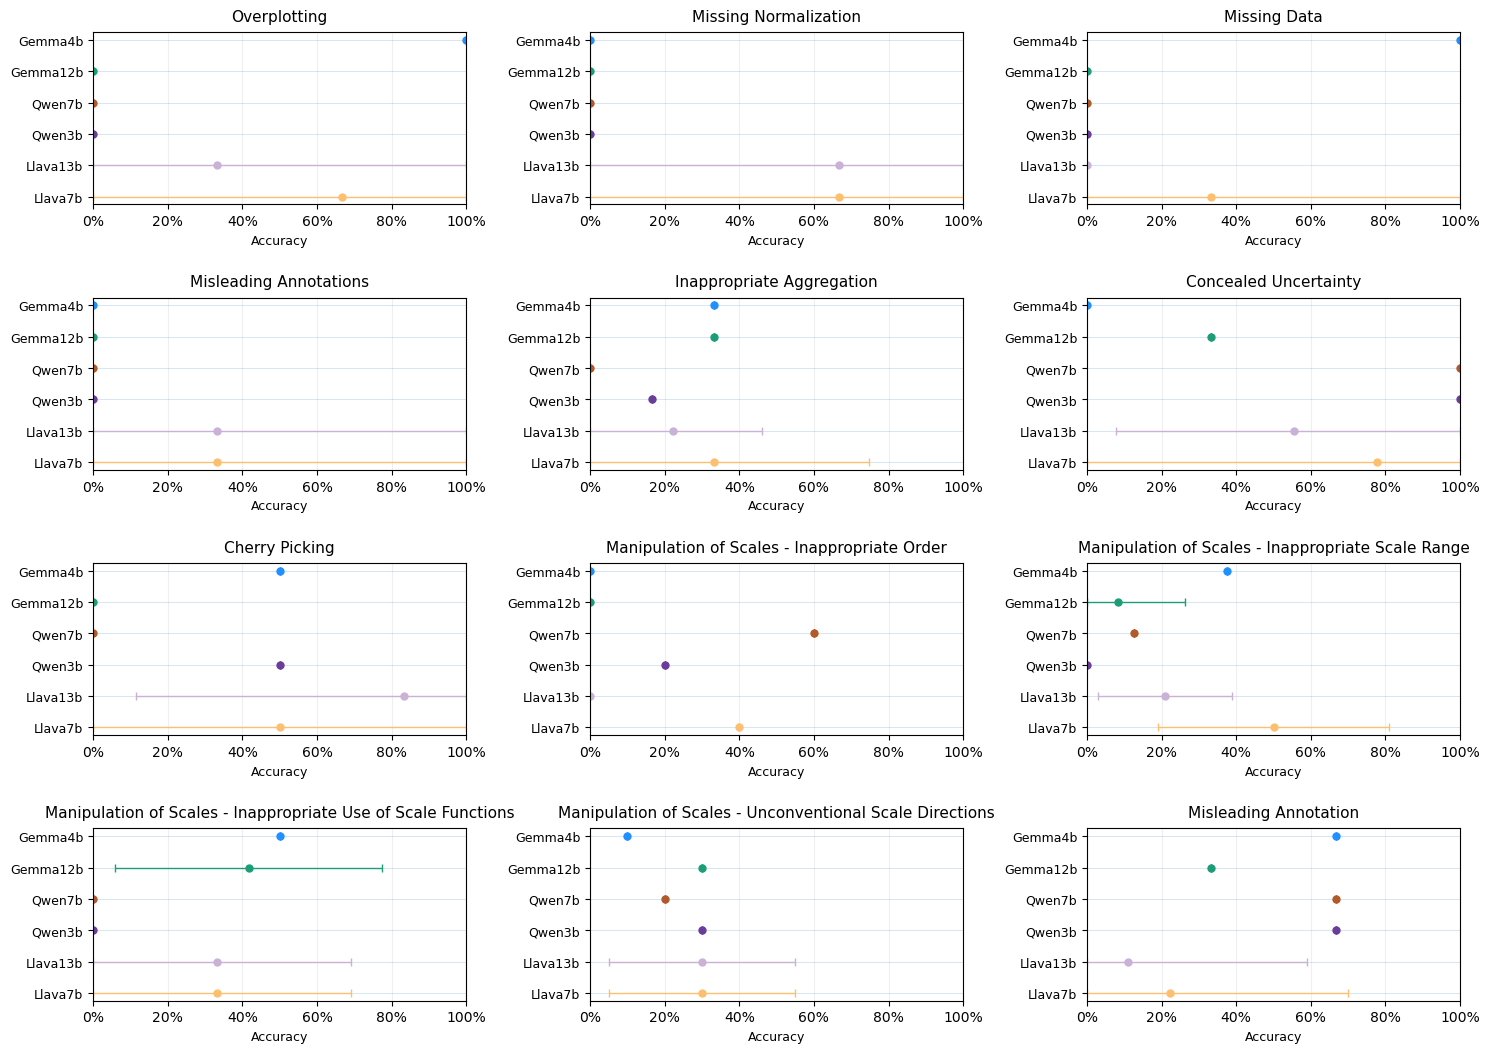

In [8]:
CALVI_SUMMARIES = [
    ("Llava7b",  "llava7b_calvi_accuracy_summary.csv"),
    ("Llava13b", "llava13b_calvi_accuracy_summary.csv"),
    ("Qwen3b",   "qwen2.5vl_3b_calvi_accuracy_summary.csv"),
    ("Qwen7b",   "qwen2.5vl_7b_calvi_accuracy_summary.csv"),
    ("Gemma12b", "gemma3_12b_calvi_accuracy_summary.csv"),
    ("Gemma4b",  "gemma3_4b_calvi_accuracy_summary.csv"),
]

# Read + combine
frames = []
for model, path in CALVI_SUMMARIES:
    df = pd.read_csv(path)
    # normalize column name to 'Misleader'
    if "Misleader" not in df.columns:
        for c in df.columns:
            if c.lower().replace(" ", "") in {"misleader","misleadertype","calvi_type"}:
                df = df.rename(columns={c: "Misleader"})
                break
    if "Model" not in df.columns:
        df["Model"] = model
    frames.append(df[["Misleader","Model","mean","ci_lo","ci_hi"]])
S = pd.concat(frames, ignore_index=True)

# Order for y-axis and panels (edit to your exact labels)
MODEL_ORDER = ["Llava7b","Llava13b","Qwen3b","Qwen7b","Gemma12b","Gemma4b"]
MODEL_ORDER = [m for m in MODEL_ORDER if m in S["Model"].unique()]

MISLEADER_ORDER = [
    "Overplotting",
    "Missing Normalization",
    "Missing Data",
    "Misleading Annotations",
    "MS - Unconventional Scale Directions",
    "MS - Inappropriate Order",
    "MS - Inappropriate Use of Scale Functions",
    "MS - Inappropriate Scale Range",
    "Inappropriate Aggregation",
    "Concealed Uncertainty",
    "Cherry Picking",
]
present = [m for m in MISLEADER_ORDER if m in S["Misleader"].unique()]
others  = sorted([m for m in S["Misleader"].unique() if m not in present])
PANELS  = present + others

# Colors per model
MODEL_COLORS = {
    "Llava7b":  "#fdbf6f",
    "Llava13b": "#cab2d6",
    "Qwen3b":   "#6a3d9a",
    "Qwen7b":   "#b15928",
    "Gemma4b":  "#1E90FF",
    "Gemma12b": "#1b9e77",
}

# Plot
ncols = 3
nrows = int(np.ceil(len(PANELS)/ncols))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5*ncols, 2.8*nrows), sharex=True)
axes = np.array(axes).reshape(-1)

for ax, mis in zip(axes, PANELS):
    sub = S[S["Misleader"] == mis].copy()
    sub = sub.set_index("Model").reindex(MODEL_ORDER).reset_index()

    y = np.arange(len(MODEL_ORDER))
    ax.hlines(y, xmin=0, xmax=100, linewidth=0.5, alpha=0.25)

    for i, row in sub.iterrows():
        if pd.notna(row["mean"]):
            color = MODEL_COLORS.get(row["Model"], "gray")
            lo = max(0, row["ci_lo"])
            hi = min(100, row["ci_hi"])
            ax.errorbar(
                row["mean"], y[i],
                xerr=[[row["mean"] - lo], [hi - row["mean"]]],
                fmt='o', color=color, ecolor=color,
                capsize=3, elinewidth=1, markersize=5
            )

    ax.set_title(mis, fontsize=11, pad=8)
    ax.set_xlim(0, 100)
    ax.set_yticks(y)
    ax.set_yticklabels(MODEL_ORDER, fontsize=9)
    ax.set_xticks(np.arange(0, 101, 20))
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x)}%"))
    ax.tick_params(axis='x', which='both', labelbottom=True)
    ax.set_xlabel("Accuracy", fontsize=9)
    ax.grid(axis="x", alpha=0.2)

# blank extra axes if any
for ax in axes[len(PANELS):]:
    ax.axis("off")


# fig.suptitle("Performance across different misleader types in CALVI assessment (mean accuracy with 95% CI)", fontsize=14)
fig.tight_layout(rect=[0,0,1,0.95], h_pad=2.0, w_pad=1.5)
plt.savefig("calvi_misleaders_dot_ci_panels.png", dpi=300, bbox_inches="tight")
plt.show()
